# 다변수 함수와 벡터함수 : 입력이 여러 개, 출력이 여러 개인 함수

## 입력과 출력에 따른 함수의 분류
- 다음과 같은 순서로 알아보기
    1. 입력이 여러 개인 함수의 정의와 그래프의 의미
    2. 출력이 여러 개인 함수의 정의와 그래프의 의미
    3. 여러 함수가 합성된 합성함수
    4. 여러 가지 함수를 합성하여 만든 초간단 분류기 실습
    
### 스칼라와 벡터
- 스칼라 : 크기만을 나타내는 수학도구
    - 온도, 재산 등의 크기를 표시할 때 쓰는 도구
    - 숫자 하나로 표현되는 양 (scale과 비슷한 의미)
- 벡터 : 크기와 방향을 모두 가지는 수학 도구
    - ex) 속도는 방향과 크기를 모두 가지므로 벡터
- 스칼라와 벡터는 x와 __x__ 로 표시
    - __x__에 들어있는 각 숫자를 벡터의 요소, 요소의 개수를 벡터의 차원이라고 표시
    - ex) __v__ = (x, y, z)는 3차원벡터, x,y,z는 벡터가 가지는 요소
    - 벡터를 표시할때는 숫자를 세로로 나열(열 벡터)할 수도 있고, 가로로 나열(행 벡터)할 수도 있음 (기본은 열벡터)
    
## 일변수 스칼라함수
- 일변수 스칼라함수 : 2장에서처럼 숫자 하나가 입력되고 숫자 하나가 출력되는 함수들
- y = f(x)
- 입력 x와 출력y가 모두 스칼라
- 다항식 형태라고 해도 입력과 출력이 여러 개가 될 수 있음

## 일변수 벡터함수
- r(t) = (f1(t), f2(t), ... , fn(t))^T
- n차원 벡터를 결과로 돌려주는 벡터함수, 입력은 숫자 t 하나밖에 없음
- f: R -> R^n (R은 실수 전체 집합)
- 함수의 형태는 다항함수, 지수함수, 로그함수 등 어떤 형태도 가능

In [1]:
# 기본적인 import들
# 이후 그래프 그리는 코드에는 중복으로 적지 않음.
# 다른 곳으로 그래프 그리는 코드를 복사-붙이기 할 때는 
# 이 import 코드와 함께 복사-붙이기 해야함
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d
import matplotlib.font_manager as mfm

# numpy 출력 형식 지정
np.set_printoptions(precision=4, linewidth=150)

# matplotlib 스타일 지정
mpl.style.use('bmh')
mpl.style.use('seaborn-whitegrid')
style = plt.style.library['bmh']
# 스타일 컬러를 쉽게 쓸 수 있도록 리스트 저장
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

# 그림을 로컬 폴더에 저장하고 싶으면 True로 수정 
file_print = False

In [2]:
# 아래 코드의 주석 제거 후 경로를 유저 컴퓨터의 폰트 파일 경로로 수정하세요.
path = './noviceml/font/NanumBarunGothic.ttf'
fontprop = mfm.FontProperties(fname=path, size=18)

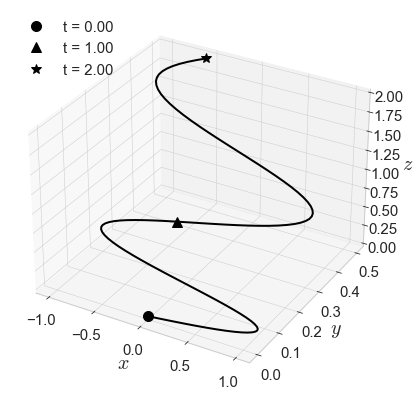

In [3]:
fig = plt.figure(figsize=(7, 7))
# 3차원 좌표축 생성
ax = plt.axes(projection='3d')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.zaxis.set_tick_params(labelsize=15)
ax.set_xlabel('$x$', fontsize=20)
ax.set_ylabel('$y$', fontsize=20)
ax.set_zlabel('$z$', fontsize=20)

# t범위 생성 및 t에대해서 x,y,z값 계산
t = np.linspace(0, 2, 101)
x = np.sin(6*t)
y = 1/4 * t
z = t**2 / 2

# x,y,z 좌표값을 통해 plot3D 함수로 그림 그리기
ax.plot3D(x, y, z, c='k')

# 0, 50, 마지막 좌표를 따로 표시 (동그라미 / 세모 / 별)
ax.plot([x[0]],  [y[0]],  [z[0]],  'o', markersize=10, color='k',
        label="t = {:.2f}".format(t[0]))
ax.plot([x[50]], [y[50]], [z[50]], '^', markersize=10, color='k',
        label="t = {:.2f}".format(t[50]))
ax.plot([x[-1]], [y[-1]], [z[-1]], '*', markersize=10, color='k',
        label="t = {:.2f}".format(t[-1])) 

ax.legend(fontsize=15, loc="upper left")

if file_print == True :
    fig.savefig("imgs/chap3/fig3-1.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap3/fig3-1.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

- 숫자 t를 3차원의 어떤 점으로 바꿔 줌
- 일변수 벡터함수는 시간(t)에 따라 공간(3차원 출력)을 이동하는 대상을 모델링할 수 있음

## 다변수 스칼라함수
- 목적함수 (손실함수, 비용함수) : 함숫값을 줄이면 어떤 목적이 달성되는 함수
    - 대부분 머신러닝 알고리즘은 목적함수의 가장 작은 위치를 찾아내는 과정 거침
    - 목적함수들이 다변수 스칼라함수
    - 입력이 여러개이고 출력이 하나인 함수
- y = f(__x__)
    - 구체적인 예) f(x,y) = x + y
    - 복잡한 모양의 예) f(x1, x2) = 50(x2 - x1^2)^2 + (2 - x1)^2
    - 우변 정의대로 식을 계산하면 숫자 하나가 결정됨
    - f: R^2 -> R (각 입력변수 차원의 제곱 차원이 정의역)
- 벡터형식으로 쓸수 있음 = 벡터변수 스칼라 함수라고 이야기하기도 함

### 그래프 그리기

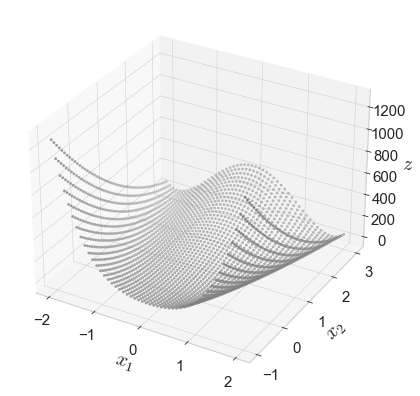

In [4]:
fig = plt.figure(figsize=(7, 7))

ax = plt.axes(projection='3d')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.zaxis.set_tick_params(labelsize=15)
ax.set_xlabel(r'$x_1$', fontsize=20)
ax.set_ylabel(r'$x_2$', fontsize=20)
ax.set_zlabel(r'$z$', fontsize=20)

# 함수의 정의역 설정
x1 = np.linspace(-2, 2, 50)
x2 = np.linspace(-1, 3, 50)

# np.meshgrid()를 사용하여 각 변수에 대한 그리드 생성
X1, X2 = np.meshgrid(x1, x2)

# X1과 X2 이용하여 식 계산
# 계산결과 2차원 어레이로 교차점에서 함숫값 담고 있음
Z = 50*(X2 - X1**2)**2 + (2-X1)**2

# 계산 결과 이용하여 3차원 그래프 그리기
ax.scatter3D(X1, X2, Z, marker='.', color='gray')

if file_print == True :
    fig.savefig("imgs/chap3/fig3-3.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap3/fig3-3.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

#### 그리드 생성
- np.meshgird()는 2차원 평면에 그물 같은 그리드 좌표 생성
- x1, x2의 1차원 어레이를 통해 각 좌표가 교차되는 점의 좌표를 X1, X2에 저장

In [5]:
print(x1, x2)
print(X1)
print(X2)

[-2.     -1.9184 -1.8367 -1.7551 -1.6735 -1.5918 -1.5102 -1.4286 -1.3469 -1.2653 -1.1837 -1.102  -1.0204 -0.9388 -0.8571 -0.7755 -0.6939 -0.6122
 -0.5306 -0.449  -0.3673 -0.2857 -0.2041 -0.1224 -0.0408  0.0408  0.1224  0.2041  0.2857  0.3673  0.449   0.5306  0.6122  0.6939  0.7755  0.8571
  0.9388  1.0204  1.102   1.1837  1.2653  1.3469  1.4286  1.5102  1.5918  1.6735  1.7551  1.8367  1.9184  2.    ] [-1.     -0.9184 -0.8367 -0.7551 -0.6735 -0.5918 -0.5102 -0.4286 -0.3469 -0.2653 -0.1837 -0.102  -0.0204  0.0612  0.1429  0.2245  0.3061  0.3878
  0.4694  0.551   0.6327  0.7143  0.7959  0.8776  0.9592  1.0408  1.1224  1.2041  1.2857  1.3673  1.449   1.5306  1.6122  1.6939  1.7755  1.8571
  1.9388  2.0204  2.102   2.1837  2.2653  2.3469  2.4286  2.5102  2.5918  2.6735  2.7551  2.8367  2.9184  3.    ]
[[-2.     -1.9184 -1.8367 ...  1.8367  1.9184  2.    ]
 [-2.     -1.9184 -1.8367 ...  1.8367  1.9184  2.    ]
 [-2.     -1.9184 -1.8367 ...  1.8367  1.9184  2.    ]
 ...
 [-2.     -1.9184 -1.8

#### 점을 빼곡히 찍어 연속된 곡면 만들기

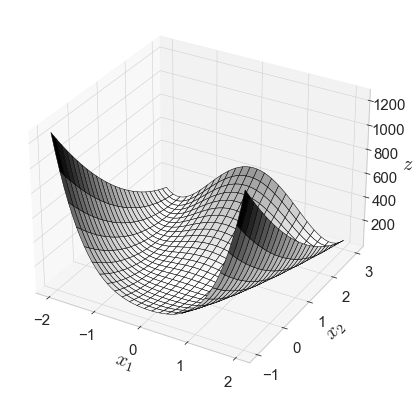

In [6]:
fig = plt.figure(figsize=(7, 7))

x1 = np.linspace(-2, 2, 51)
x2 = np.linspace(-1, 3, 51)
X1, X2 = np.meshgrid(x1, x2)
Z = 50*(X2 - X1**2)**2 + (2-X1)**2

ax = plt.axes(projection='3d')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.zaxis.set_tick_params(labelsize=15)

# scatter3D()를 plot_surface()로 바꾸기
ax.plot_surface(X1, X2, Z, cmap=plt.cm.binary, edgecolor="k")

ax.set_xlabel(r'$x_1$', fontsize=20)
ax.set_ylabel(r'$x_2$', fontsize=20)
ax.set_zlabel(r'$z$', fontsize=20)

if file_print == True :
    fig.savefig("imgs/chap3/fig3-4.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap3/fig3-4.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

### 한쪽이 숫자로 고정되면?
- 함수식의 한쪽이 숫자로 고정되어 있는 경우
    - 50(x2 - x1^2)^2 + (2 - x1)^2 = 200
- 정의역과 공역의 관계가 특정 경우에 한정되게 됨
- 특정 값을 대입해야 등호가 성립하기 때문에 함수라고 할 수 없음
- 독립과 종속 관계가 명시적으로 드러나 있지 않고, 두 변수가 한 식에 함께 나타나 있어 관계가 명시적으로 드러나지 않음
- 이런 경우 음함수(implicit function)라는 용어로 지칭
- 위 관계를 만족시키는 (x1, x2) 순서쌍들은 방정식을 만족시키는 해집합이라고 할 수 있음

#### 해집합으로 그래프 그리기
- 사용할 등고선 생성

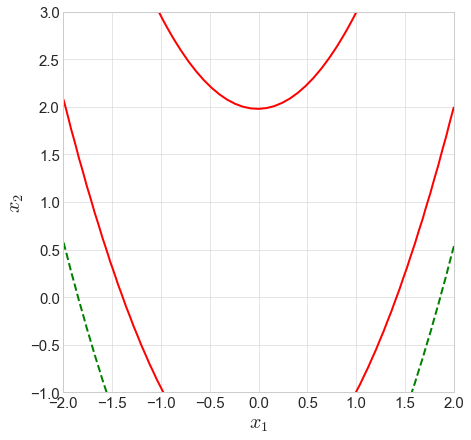

In [7]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

x1 = np.linspace(-2, 2, 51)
x2 = np.linspace(-1, 3, 51)
X1, X2 = np.meshgrid(x1, x2)
Z = 50*(X2 - X1**2)**2 + (2-X1)**2

contours = ax.contour(X1, X2, Z, levels=[200, 600],  colors=['r','g','b'], 
            linestyles=['solid','dashed', 'dotted'])

ax.set_xlabel(r'$x_1$', fontsize=20)
ax.set_ylabel(r'$x_2$', fontsize=20)

plt.show()

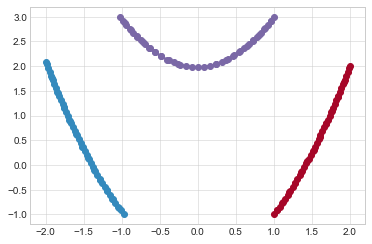

In [8]:
segs200=contours.collections[0].get_segments()

plt.plot(segs200[0][:,0], segs200[0][:,1], 'o-')
plt.plot(segs200[1][:,0], segs200[1][:,1], 'o-')
plt.plot(segs200[2][:,0], segs200[2][:,1], 'o-')

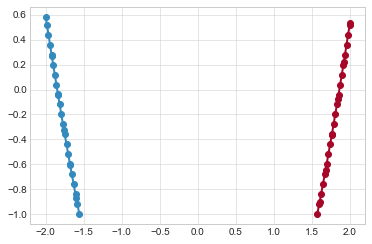

In [9]:
segs600=contours.collections[1].get_segments()

plt.plot(segs600[0][:,0], segs600[0][:,1], 'o-')
plt.plot(segs600[1][:,0], segs600[1][:,1], 'o-')

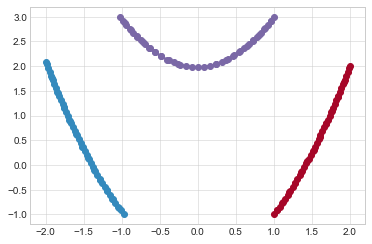

In [10]:
paths200=contours.collections[0].get_paths()
# print(paths[0].vertices)
# print(paths[1].vertices)
plt.plot(paths200[0].vertices[:,0], paths200[0].vertices[:,1], 'o-')
plt.plot(paths200[1].vertices[:,0], paths200[1].vertices[:,1], 'o-')
plt.plot(paths200[2].vertices[:,0], paths200[2].vertices[:,1], 'o-')
plt.show()

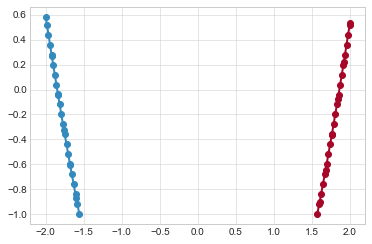

In [11]:
paths600=contours.collections[1].get_paths()
# print(paths[0].vertices)
# print(paths[1].vertices)
plt.plot(paths600[0].vertices[:,0], paths600[0].vertices[:,1], 'o-')
plt.plot(paths600[1].vertices[:,0], paths600[1].vertices[:,1], 'o-')

plt.show()

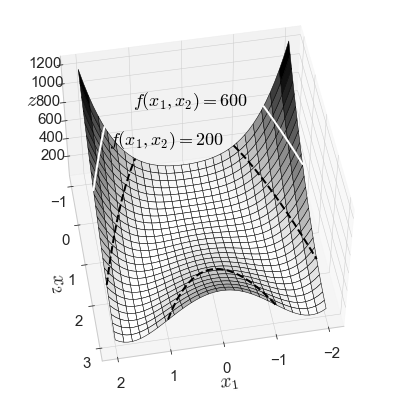

In [12]:
fig = plt.figure(figsize=(7, 7))

x1 = np.linspace(-2, 2, 51)
x2 = np.linspace(-1, 3, 51)
X1, X2 = np.meshgrid(x1, x2)
Z = 50*(X2 - X1**2)**2 + (2-X1)**2

ax = plt.axes(projection='3d')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.zaxis.set_tick_params(labelsize=15)

ax.plot_surface(X1, X2, Z, cmap=plt.cm.binary, edgecolor="k")
#ax.plot_wireframe(X1, X2, Z, cmap=plt.cm.OrRd, edgecolor="k")

ax.plot3D(paths200[0].vertices[:,0], paths200[0].vertices[:,1], [200]*paths200[0].vertices.shape[0], 
          lw=2, color='k', linestyle='--')
ax.plot3D(paths200[1].vertices[:,0], paths200[1].vertices[:,1], [200]*paths200[1].vertices.shape[0], 
          lw=2, color='k', linestyle='--')
ax.plot3D(paths200[2].vertices[:,0], paths200[2].vertices[:,1], [200]*paths200[2].vertices.shape[0], 
          lw=2, color='k', linestyle='--')

ax.plot3D(paths600[0].vertices[:,0], paths600[0].vertices[:,1], [600]*paths600[0].vertices.shape[0], 
          lw=2, color='w', linestyle='-')
ax.plot3D(paths600[1].vertices[:,0], paths600[1].vertices[:,1], [600]*paths600[1].vertices.shape[0], 
          lw=2, color='w', linestyle='-')

ax.text(1.5, -1,  400, r"$f(x_1, x_2)=200$", color='k', fontsize=18)
ax.text(1., -1, 800, r"$f(x_1, x_2)=600$", color='k', fontsize=18)

ax.set_xlabel(r'$x_1$', fontsize=20)
ax.set_ylabel(r'$x_2$', fontsize=20)
ax.set_zlabel(r'$z$', fontsize=20)

ax.view_init(50, 80)

if file_print == True :
    fig.savefig("imgs/chap3/fig3-5.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap3/fig3-5.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

- 이변수 함수에서 함숫값을 제한하면 곡면이 곡선으로 바뀜

#### 함숫값 30, 200, 600을 만족하는 (x1, x2)들을 평면에 그리기

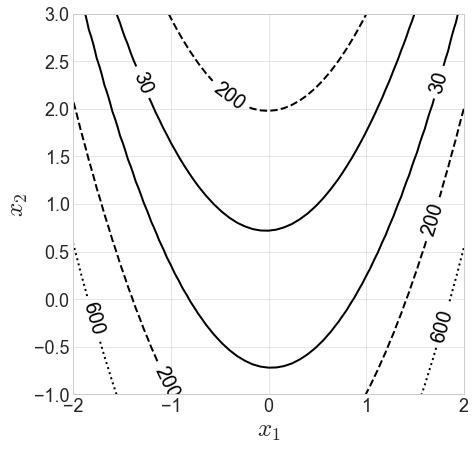

In [13]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)

x1 = np.linspace(-2, 2, 51)
x2 = np.linspace(-1, 3, 51)
X1, X2 = np.meshgrid(x1, x2)
Z = 50*(X2 - X1**2)**2 + (2-X1)**2

contours = ax.contour(X1, X2, Z, levels=[30, 200, 600],  colors='k', 
            linestyles=['solid','dashed', 'dotted'])

ax.clabel(contours, contours.levels, fmt="%d", inline=True, fontsize=20)

ax.set_xlabel(r'$x_1$', fontsize=25)
ax.set_ylabel(r'$x_2$', fontsize=25)

if file_print == True :
    fig.savefig("imgs/chap3/fig3-6.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap3/fig3-6.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

- 위 그림은 함숫값 30, 200, 600을 만족하는 (x1, x2)들을 평면에 그린 그림
    - 2차원 평면에서 정의된 함수를 2차원 평면에 그린 것
    - 경사도벡터의 방향이 어느방향인지 등고선 그래프로 알 수 있음

#### 변수가 세 개라면
- 그림을 그릴 수 없음
    - 실수 세 개로 구성된 정의역은 3차원 공간 전체가 되기 때문
- 한쪽을 숫자로 고정하게 되면
    - 함숫값을 가지는 입력 점들이 3차원 공간에 곡면으로 그려지게 됨
    - 등고선그래프와 같은 현상이 3차원 공간에 나타남
- 변수가 네 개 이상이면 아예 그림을 그릴 수 없음

## 다변수 벡터함수
- 입력도 여러개, 출력도 여러개인 함수
- F(__x__) = (f1(__x__), f2(__x__), ... , fn(__x__))^T, __x__ R^m
    - 입력 m개가 출력 n개로 변환되는 벡터함수
    - 입력 __x__는 숫자 m개가 모인 벡터
    - 각 성분 함수 fi(__x__)는 f:R^m -> R인 다변수 스칼라함수
- 예시(p.63) 함수의 그림 그리기

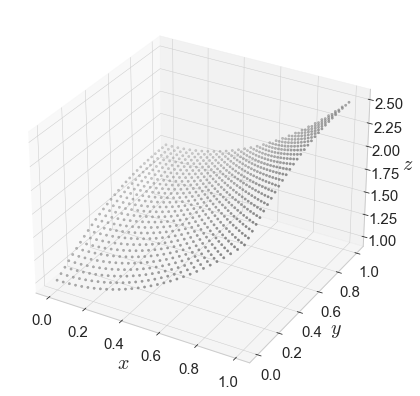

In [14]:
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.zaxis.set_tick_params(labelsize=15)
ax.set_xlabel(r'$x$', fontsize=20)
ax.set_ylabel(r'$y$', fontsize=20)
ax.set_zlabel(r'$z$', fontsize=20)

u = np.linspace(0,1,30)
v = np.linspace(0,1,30)
U, V = np.meshgrid(u, v)
X = U
Y = V
Z = (1+U**2) + (V/(1+V**2))

ax.scatter3D(X, Y, Z, marker='.', color='gray')
# ax.plot_surface(X, Y, Z, color='gray')


if file_print == True :
    fig.savefig("imgs/chap3/fig3-7.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap3/fig3-7.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

- 3차원 공간에 점 900개가 곡면 이루고 있음
    - 입력평면 uv는 이 그래프에 나타나지 않음
    
### 그래프 방식 표현
- 그래프 : 동그라미를 선으로 연결한 그림
    - 노드 : 동그라미
    - 엣지 : 출력에 관여하는 입력을 연결한 점선과 실선
    - 연결선이 모이는 부분에서는 덧셈이 일어난다고 정의

## 합성함수
- 함수의 합성 : 어떤 함수의 출력을 다른 벡터함수의 입력으로 사용하는 것으로 연결
- 그래프로 알아보기 (입력 x, 출력 y)

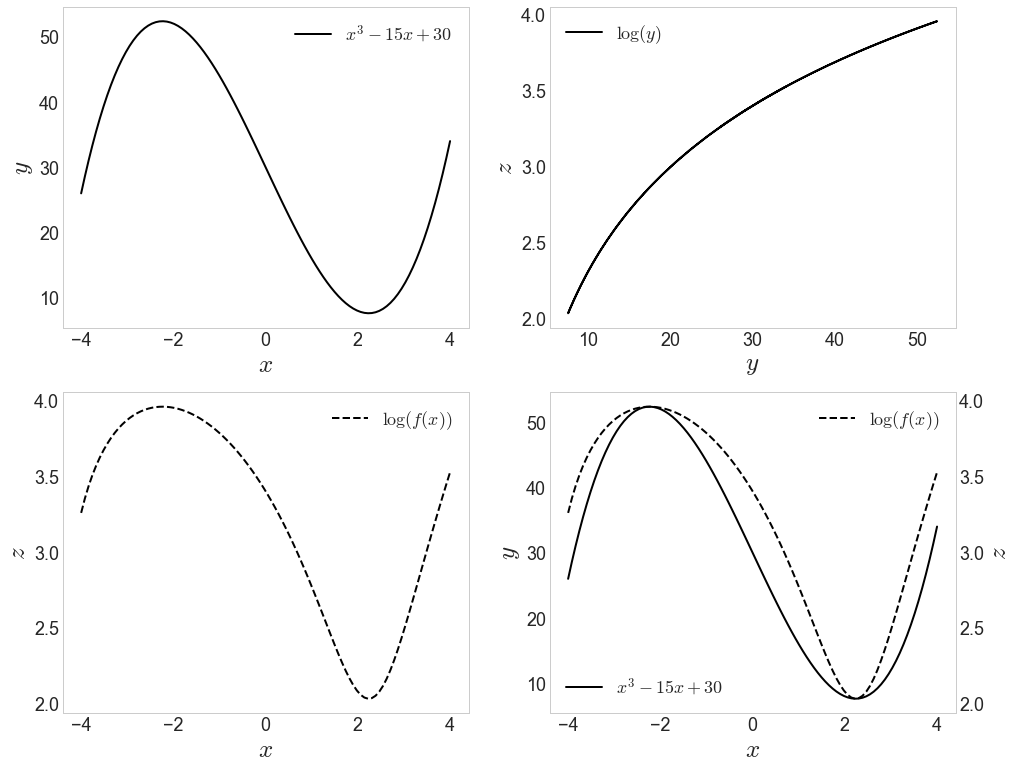

In [15]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches((16,13))

plt.subplots_adjust(wspace=0.2, hspace=0.2)
x = np.linspace(-4, 4, 100)
y = x**3 - 15*x + 30
z = np.log(y)

ax[0,0].plot(x,y, label=r'$x^3 -15x + 30$', color='k')
ax[0,0].xaxis.set_tick_params(labelsize=18)
ax[0,0].yaxis.set_tick_params(labelsize=18)
ax[0,0].set_xlabel('$x$', fontsize=25)
ax[0,0].set_ylabel('$y$', fontsize=25)
ax[0,0].legend(fontsize=18)
ax[0,0].grid(False)

ax[0,1].plot(y,z, label=r'$\log(y)$', color='k')
ax[0,1].xaxis.set_tick_params(labelsize=18)
ax[0,1].yaxis.set_tick_params(labelsize=18)
ax[0,1].set_xlabel('$y$', fontsize=25)
ax[0,1].set_ylabel('$z$', fontsize=25)
ax[0,1].legend(fontsize=18)
ax[0,1].grid(False)

ax[1,0].plot(x,z, '--', label=r'$\log(f(x))$', color='k')
ax[1,0].xaxis.set_tick_params(labelsize=18)
ax[1,0].yaxis.set_tick_params(labelsize=18)
ax[1,0].set_xlabel('$x$', fontsize=25)
ax[1,0].set_ylabel('$z$', fontsize=25)
ax[1,0].legend(fontsize=18)
ax[1,0].grid(False)

ax[1,1].plot(x,y, label=r'$x^3 -15x + 30$', color='k')
ax[1,1].xaxis.set_tick_params(labelsize=18)
ax[1,1].yaxis.set_tick_params(labelsize=18)
ax[1,1].set_xlabel('$x$', fontsize=25)
ax[1,1].set_ylabel('$y$', fontsize=25)
ax[1,1].legend(loc='lower left', fontsize=18)
ax[1,1].grid(False)

ax_ = ax[1,1].twinx()
ax_.plot(x,z, '--', label=r'$\log(f(x))$', color='k')
ax_.yaxis.set_tick_params(labelsize=18)
ax_.set_ylabel('$z$', fontsize=25)
ax_.grid(False)
ax_.legend(fontsize=18)

if file_print == True :
    fig.savefig("imgs/chap3/fig3-13.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap3/fig3-13.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

- 좌상단그래프는 f(x)그래프
- 우상단그래프는 g(y)그래프
    - 좌상단 그래프의 세로축범위가 우상단 그래프의 가로축 범위와 일치
    - 좌상단 그래프의 공역이 우상단 그래프의 정의역이 된 것 (최종 출력은 z)
- 좌하단그래프는 x와 z의 함수 (함성함수)
- 우하단그래프는 f(x)와 g(f(x)를 함께 그린 것

## 자주 만나는 특별한 함수 : 소프트맥스 함수
- 우변의 정의 : __z__를 입력 받아 i번째 요소 계산
    - 함수의 출력도 벡터
    - 즉, 소프트맥스 함수는 다변수 벡터함수
- 소프트맥스 함수는 출력한 숫자가 동일한 분모에 대해서 각 요소가 차지하는 비율
    - 모두 더하면 1이됨
    - 어떤 숫자가 커지면 다른 숫자가 작아짐
    - 함수의 출력은 확률로 해석가능
    - 여러 항목에 대한 확률 출력가능
- 가장 큰 확률을 가지는 항목을 정답으로 출력함

## 여러가지 함수를 활용한 초간단 분류기
- https://metamath1.github.io/noviceml/toyclassifier.html